In [1]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt


kickstarter_df = pd.read_csv("ks-projects-201801.csv")

kickstarter_df.sort_values(by=['launched'], inplace=True)

kickstarter_df['deadline'] = kickstarter_df['deadline'].apply(
    lambda d: datetime.strptime(d, '%Y-%m-%d'))
kickstarter_df['launched'] = kickstarter_df['launched'].apply(
    lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

In [2]:
kickstarter_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00


In [3]:
kickstarter_df['state'].unique()

array(['canceled', 'suspended', 'failed', 'successful', 'undefined',
       'live'], dtype=object)

In [4]:
count_antes_do_filtro =  kickstarter_df.shape[0]
print(count_antes_do_filtro)

378661


In [5]:
kickstarter_df['launched'].max()

Timestamp('2018-01-02 15:02:31')

In [6]:
kickstarter_df['launched'].min()

Timestamp('1970-01-01 01:00:00')

In [7]:
kickstarter_df = kickstarter_df[
    (kickstarter_df['state'] != 'live') 
    & (kickstarter_df['state'] != 'undefined')
    & (kickstarter_df['state'] != 'canceled')
    & (kickstarter_df['state'] != 'suspended')]

In [8]:
kickstarter_df['state'].unique()

array(['failed', 'successful'], dtype=object)

In [9]:
count_depois_do_filtro =  kickstarter_df.shape[0]
print(count_depois_do_filtro)

331675


In [10]:
 count_antes_do_filtro - count_depois_do_filtro

46986

In [11]:
kickstarter_df['launched'].min()

Timestamp('2009-04-21 21:02:48')

In [12]:
kickstarter_df.shape

(331675, 15)

In [13]:
failed_count = kickstarter_df[kickstarter_df['state'] == 'failed'].shape[0]
print(failed_count)

197719


In [14]:
successful_count = kickstarter_df[kickstarter_df['state'] == 'successful'].shape[0]
successful_count

133956

In [15]:
failed_count/kickstarter_df.shape[0]

0.5961227104846611

In [16]:
successful_count/kickstarter_df.shape[0]

0.4038772895153388

In [17]:
kickstarter_df['count'] = 1

In [18]:
import plotly.express as px

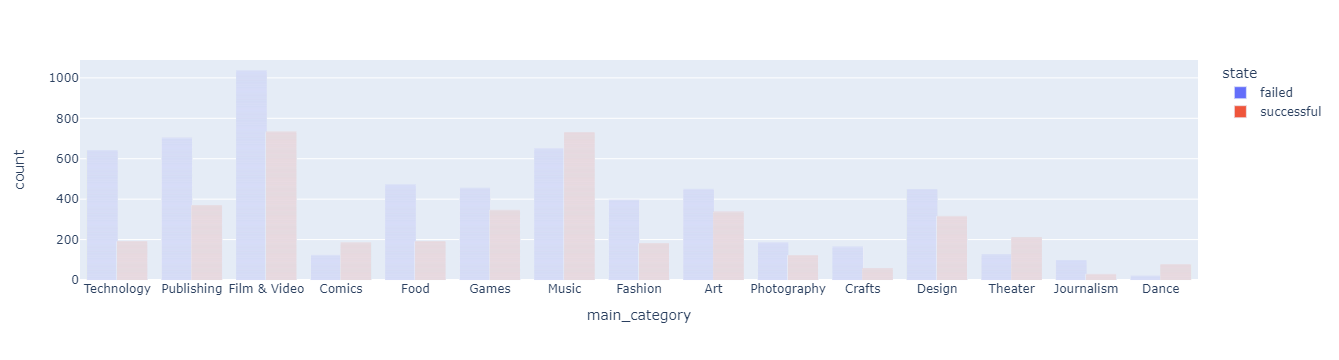

In [25]:
fig = px.bar(kickstarter_df.sample(10000), x='main_category', y ='count',color= 'state', barmode='group')
fig.show()

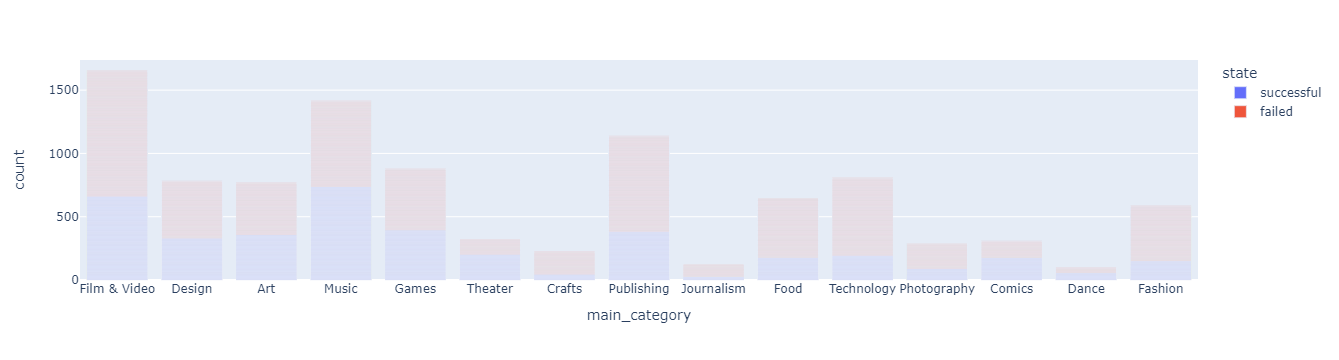

In [20]:
fig = px.bar(kickstarter_df.sample(10000), x='main_category', y ='count',color= 'state', barmode='relative')
fig.show()

In [21]:
kickstarter_df.sample(10000)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,count
246823,325346499,bRudeNoMo,Shorts,Film & Video,USD,2011-06-26,7250.0,2011-05-17 20:41:19,25.0,failed,1,US,25.0,25.0,7250.0,1
342538,81487569,REDiscover: The Human Connection,Film & Video,Film & Video,USD,2011-10-24,61000.0,2011-09-22 04:57:23,155.0,failed,2,US,155.0,155.0,61000.0,1
88281,1448896267,Tenthium - 99% Pure Element Cubes With Elegant...,Product Design,Design,USD,2016-04-16,50000.0,2016-03-17 03:12:02,12940.0,failed,59,US,12940.0,12940.0,50000.0,1
328347,74268125,Healthy Eats Restaurant,Restaurants,Food,USD,2014-08-08,70000.0,2014-07-09 16:56:15,0.0,failed,0,US,0.0,0.0,70000.0,1
1212,1006151423,Pirates Lagoon,Tabletop Games,Games,USD,2017-08-19,3000.0,2017-07-27 22:11:12,470.0,failed,10,US,393.0,470.0,3000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344813,826409079,Amirah: Indianapolis' New All Ages EDM Venue.,Electronic Music,Music,USD,2015-10-21,65000.0,2015-09-21 06:00:40,178.0,failed,11,US,178.0,178.0,65000.0,1
99351,1504287704,Undercover•The Choir•Altar Boys•441•Crumbächer...,Rock,Music,USD,2016-11-04,45000.0,2016-10-04 18:07:44,17074.0,failed,207,US,1156.0,17074.0,45000.0,1
257917,381349729,Laudanum Gate,Music,Music,USD,2012-09-06,10000.0,2012-07-08 03:24:23,0.0,failed,0,US,0.0,0.0,10000.0,1
209432,2067343092,Smart Spray,Product Design,Design,USD,2015-03-20,20000.0,2015-02-03 11:04:17,581.0,failed,6,US,581.0,581.0,20000.0,1
